## 实验二  神经网络
### 第1.2题  累积BP算法

In [6]:
#  Wine, 数据预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

#读数据
wine = np.genfromtxt("wine_data-2.csv", delimiter=",",skip_header=1)
print(type(wine)) # numpy.ndarray
X = wine[:,0:13] 
y = wine[:,13]
# print(type(X))
# print(type(y))

x_train, x_test, y_train, y_test = train_test_split(X, y)   # 默认取出97个样本作为测试集，33个作为测试集

<class 'numpy.ndarray'>


In [7]:
label_train = LabelBinarizer().fit_transform(y_train)

In [8]:
# 定义激活函数及其导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#激活函数的导数
def d_sigmoid(x):
    return x * (1 - x)

n_samples= 97


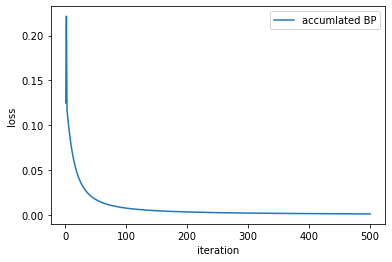

In [4]:
# 训练神经网络的函数
def train(x,y,dim=1,eta=0.1,max_iter=500):  # dim -- 输出单元数
    n_samples = x.shape[0]  #  训练样本数，
    print("n_samples=",n_samples)
    hiden_dim=50
    #定义、初始化神经元的权重
    w1 = np.zeros((x.shape[1],hiden_dim))  #  （13，50）  <--- 矩阵维数
    b1 = np.zeros((1,hiden_dim))  # （1，50）
    w2 = np.zeros((hiden_dim,1))  #  （50，1）
    b2 = np.zeros((dim,1))  #  （1，1）  
    
    losslist = []    #损失列表
    
    for ite in range(max_iter):
        ##前向传播   
        u1 = np.dot(x,w1)+b1   #（97,13）x (13 , 50) --->（97,50）
        out1 = sigmoid(u1)    # 隐含层,（97,50）
        u2 = np.dot(out1,w2)+b2   # （97,50）x (50, 1) --->（97,1）
        out2 = sigmoid(u2)    #激活层，（97,1）
        
        loss = np.mean(np.square(y - out2))/2    #均方误差，（97,1）
        losslist.append(loss)
#         print('iter:%d  loss:%.4f'%(ite,loss))

        ##反向传播
        ##累计BP
        d_out2 = -(y - out2)   # （97,1）
        d_u2 = d_out2*d_sigmoid(out2) # （97,1） 矩阵点乘
        d_w2 = np.dot(np.transpose(out1),d_u2)  # np.transpose()--矩阵转置,（50,97）x (97, 1) --->（50,1）
        d_b2 = d_u2  # (97,1)        
        
        d_out1 = np.dot(d_u2,np.transpose(w2)) # （97,1）x (1,50) --->（97,50）
        
        d_u1 = d_out1*d_sigmoid(out1)  # （97，50）点乘 (97, 50) --->（97，50）
        
        d_w1 = np.dot(np.transpose(x),d_u1) #  （13,97）x (97, 50) --->（13,50）
        
        d_b1 = d_u1  #（97，50）
        
        ##更新权重
        w1 = w1 - eta*d_w1
        w2 = w2 - eta*d_w2
        b1 = b1 - eta*d_b1
        b2 = b2 - eta*d_b2
    ##Loss可视化，损失函数曲线
    plt.figure()
    plt.plot([i+1 for i in range(max_iter)],losslist)
    plt.legend(['accumlated BP'])
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.show()
    return w1,w2,b1,b2

#开始训练神经网络
w1,w2,b1,b2 = train(x_train,label_train,1)   #  1--输出神经元个数

In [5]:
#开始训练
# w1,w2,b1,b2 = train(x_train,label_train,1)   #  1--输出神经元个数